# RLab03 - Gabriele Bertinelli (2103359)

In [ ]:
library(tidyverse)
library(gridExtra)
library(latex2exp)
library(emdbook)
library(DirichletReg)

set.seed(2103359)

#### 1)  
**1.1)**    

- We assume a *positive uniform* prior $\rightarrow g(\mu)=1$ for $\mu \gt 0$.  
- The likelihood for Poisson process, in case of multiple independent measurements, is $f(\{y_i\}|\mu) = \prod_{i=1}^n f(y_i|\mu) \propto \mu^{\sum y_i}\times e^{-n\mu}$.  
- The posterior will be $P(\mu|\{y_i\}) \propto f(\{y_i\}|\mu) \times g(\mu) \propto \mu^{\sum y_i}\times e^{-n\mu}$.  
  This is a $Gamma(\alpha, \lambda)$ function with $\alpha = \sum y_i + 1$ and $\lambda = n$.

[1] "Analytical Mean: 3.00"
[1] "Analytical Variance: 0.50"
[1] "Analytical Median: 2.94"

[1] "Numerical Mean: 3.00"
[1] "Numerical Variance: 0.50"
[1] "Numerical Median: 2.86"

[1] "Integral Mean: 3.00"
[1] "Integral Variance: 0.50"


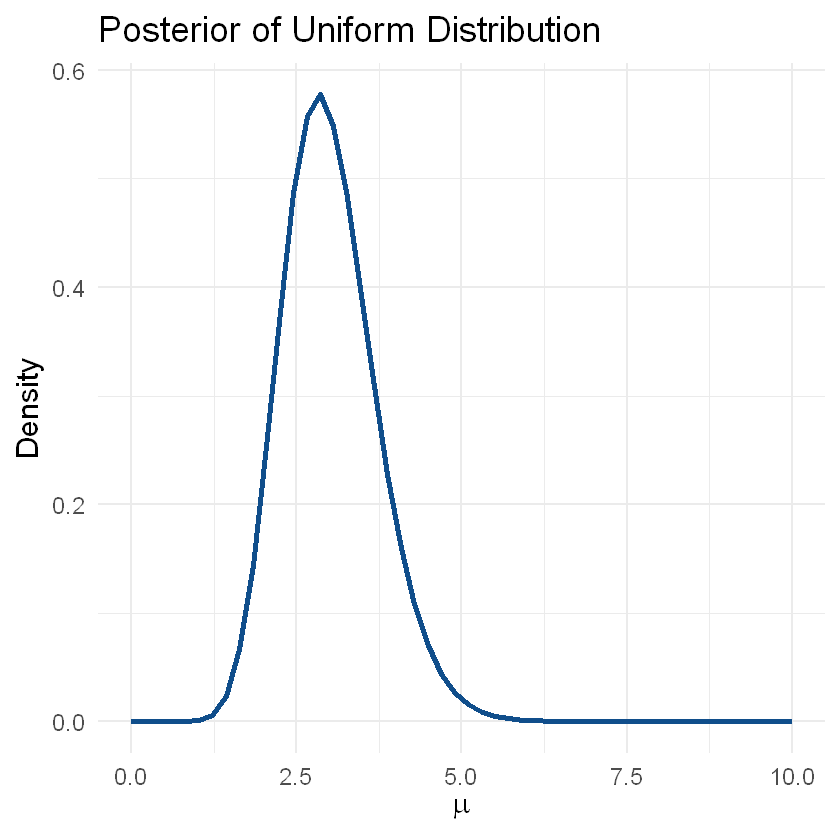

In [2]:
Dt <- 10 # sec
n.parts <- c(4,1,3,1,5,3)

post.alpha <- sum(n.parts) + 1
post.lambda <- length(n.parts)

x <- seq(0, 10, length=50)

unif.post.pdf <- dgamma(x, post.alpha, rate = post.lambda)

options(repr.plot.width = 7, repr.plot.height = 7)

unif.plot <- ggplot() +
    geom_line(aes(x=x, y=unif.post.pdf), color="dodgerblue4", lwd=1.5) +
	xlab(TeX(r'(\mu)')) +
	ylab("Density") +
	ggtitle("Posterior of Uniform Distribution") +
	theme_minimal(base_size = 18)

unif.plot

a.mean <- post.alpha / post.lambda
a.var <- post.alpha / post.lambda^2
a.median <- qgamma(0.5, post.alpha, rate = post.lambda)

# we use the sum cause the elements are discrete.
# we can use the integration that leads to the same results and we get rid of the weights.
n.mean <- sum(x*unif.post.pdf)/sum(unif.post.pdf) # analytical mean with normalization
n.var <- sum(x^2*unif.post.pdf)/sum(unif.post.pdf) - n.mean^2 # analytical variance with normalization
# n.var <- sum((x - n.mean)**2*unif.post.pdf)/sum(unif.post.pdf) # analytical variance with normalization
n.median <- x[which.max(unif.post.pdf)]

mmean <- function(x) x*dgamma(x, post.alpha, rate = post.lambda)
i.mean <- integrate(mmean, 0, Inf)$value

vvar <- function(x) x^2*dgamma(x, post.alpha, rate = post.lambda)
i.var <- integrate(vvar, 0, Inf)$value - i.mean^2


print(sprintf("Analytical Mean: %.2f", a.mean))
print(sprintf("Analytical Variance: %.2f", a.var))
print(sprintf("Analytical Median: %.2f", a.median))
cat('\n')
print(sprintf("Numerical Mean: %.2f", n.mean))
print(sprintf("Numerical Variance: %.2f", n.var))
print(sprintf("Numerical Median: %.2f", n.median))
cat('\n')
print(sprintf("Integral Mean: %.2f", i.mean))
print(sprintf("Integral Variance: %.2f", i.var))

**1.2)**  

- This time we assume a Gamma prior so that $\mu=\frac{\alpha}{\lambda}=3$ and $\sigma=\sqrt{\frac{\alpha}{\lambda^2}}=1$. In this way the parameters for our Gamma prior will be $\lambda=\frac{3}{1^2}=3$ and $\alpha=\left(\frac{3}{1}\right)^2=9$.  
- The posterior will a $Gamma(\alpha', \lambda')$ function with $\alpha'=\alpha+\sum y_i$ and $\lambda'=\lambda+n$.

[1] "Analytical Mean: 2.89"
[1] "Analytical Variance: 0.32"
[1] "Analytical Median: 2.85"

[1] "Numerical Mean: 2.89"
[1] "Numerical Variance: 0.32"
[1] "Numerical Median: 2.86"

[1] "Integral Mean: 2.89"
[1] "Integral Variance: 0.32"


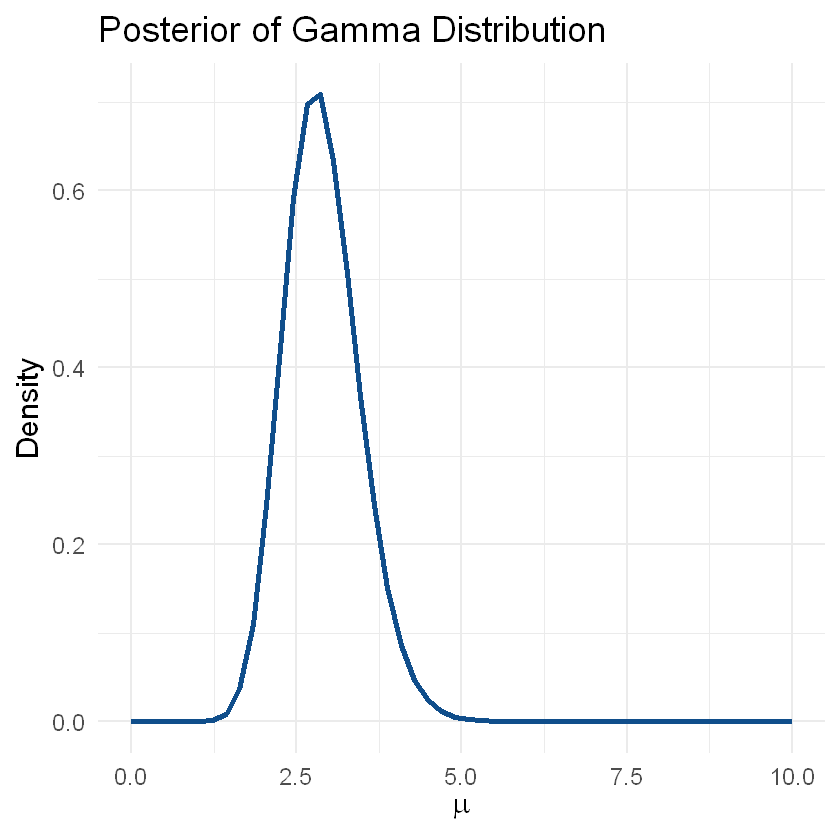

In [3]:
gamma.alpha <- 9 + sum(n.parts)
gamma.lambda <- 3 + length(n.parts)

gamma.post.pdf <- dgamma(x, gamma.alpha, rate = gamma.lambda)

options(repr.plot.width = 7, repr.plot.height = 7)

gamma.plot <- ggplot() +
    geom_line(aes(x=x, y=gamma.post.pdf), color="dodgerblue4", lwd=1.5) +
	xlab(TeX(r'(\mu)')) +
	ylab("Density") +
	ggtitle("Posterior of Gamma Distribution") +
	theme_minimal(base_size = 18)

gamma.plot

a.mean <- gamma.alpha / gamma.lambda
a.var <- gamma.alpha / gamma.lambda^2
a.median <- qgamma(0.5, gamma.alpha, rate = gamma.lambda)

# we use the sum cause the elements are discrete.
# we can use the integration that leads to the same results and we get rid of the weights.
n.mean <- sum(x*gamma.post.pdf)/sum(gamma.post.pdf) # analytical mean with normalization
n.var <- sum(x^2*gamma.post.pdf)/sum(gamma.post.pdf) - n.mean^2 # analytical variance with normalization
# n.var <- sum((x - n.mean)**2*gamma.post.pdf)/sum(gamma.post.pdf) # analytical variance with normalization
n.median <- x[which.max(gamma.post.pdf)]

mmean <- function(x) x*dgamma(x, gamma.alpha, rate = gamma.lambda)
i.mean <- integrate(mmean, 0, Inf)$value

vvar <- function(x) x^2*dgamma(x, gamma.alpha, rate = gamma.lambda)
i.var <- integrate(vvar, 0, Inf)$value - i.mean^2

print(sprintf("Analytical Mean: %.2f", a.mean))
print(sprintf("Analytical Variance: %.2f", a.var))
print(sprintf("Analytical Median: %.2f", a.median))
cat('\n')
print(sprintf("Numerical Mean: %.2f", n.mean))
print(sprintf("Numerical Variance: %.2f", n.var))
print(sprintf("Numerical Median: %.2f", n.median))
cat('\n')
print(sprintf('Integral Mean: %.2f', i.mean))
print(sprintf('Integral Variance: %.2f', i.var))

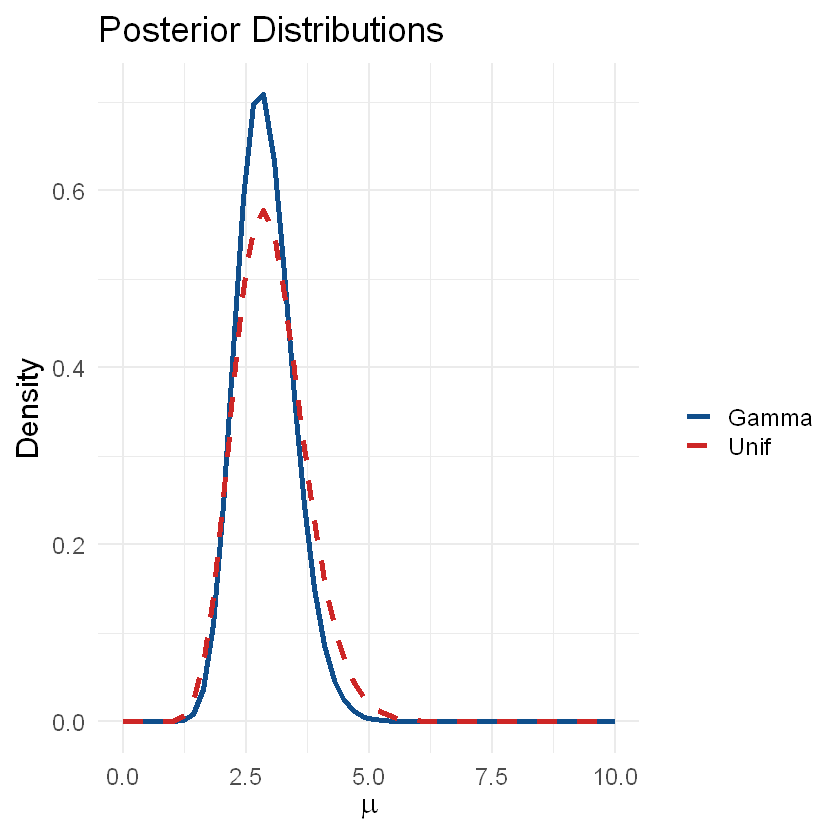

In [4]:
post.plot <- ggplot() +
    geom_line(aes(x=x, y=gamma.post.pdf, color='Gamma'), lwd=1.5) +
	geom_line(aes(x=x, y=unif.post.pdf, color='Unif'), lwd=1.5, linetype='dashed') +
	labs(x=TeX(r'(\mu)'), y='Density', title='Posterior Distributions', color = '') +
	theme_minimal(base_size = 18) + 
	scale_color_manual(values=c('Gamma' = 'dodgerblue4', 'Unif' = 'firebrick3'))

post.plot

**1.3)**

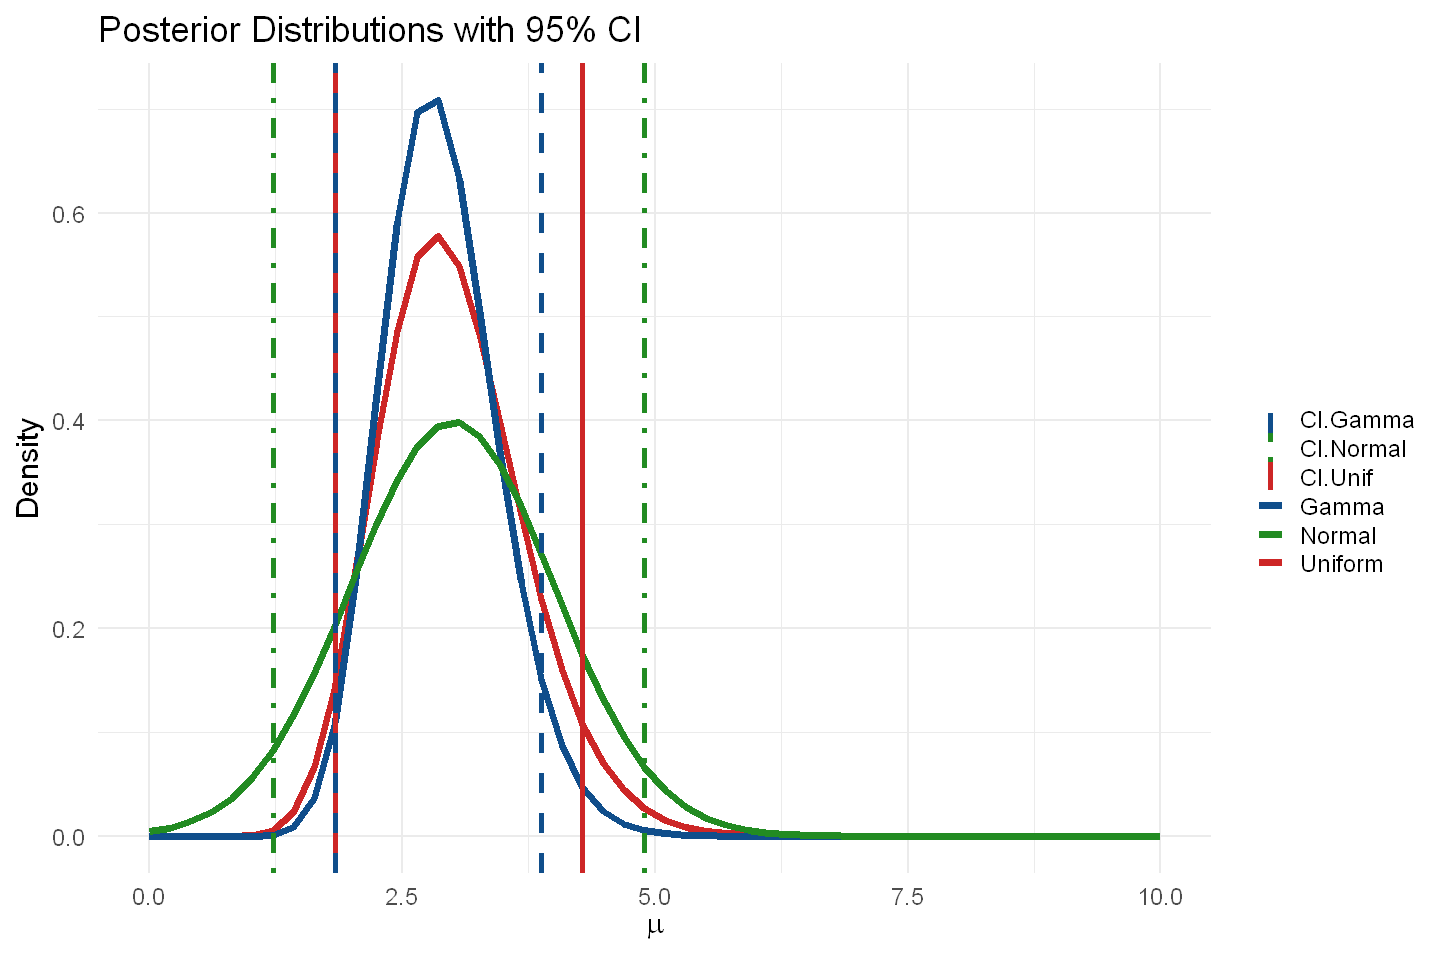

In [5]:
normal.post.pdf <- dnorm(x, mean = 3, sd = 1)

ci.unif <- emdbook::ncredint(x, unif.post.pdf, level=0.95)
ci.gamma <- emdbook::ncredint(x, gamma.post.pdf, level=0.95)
ci.normal <- emdbook::ncredint(x, normal.post.pdf, level=0.95)

options(repr.plot.width = 12, repr.plot.height = 8)

ci.plot <- ggplot() + 
	geom_line(aes(x=x, y=unif.post.pdf, color='Uniform'), lwd=2) +
	geom_line(aes(x=x, y=gamma.post.pdf, color='Gamma'), lwd=2) +
	geom_line(aes(x=x, y=normal.post.pdf, color='Normal'), lwd=2) +
	geom_vline(aes(xintercept = ci.unif[1], color = "CI.Unif"), linewidth = 1.5) +
	geom_vline(aes(xintercept = ci.unif[2], color = 'CI.Unif'), linewidth = 1.5) +

	geom_vline(aes(xintercept = ci.gamma[1], color = "CI.Gamma"), linewidth = 1.5, linetype='dashed') +
	geom_vline(aes(xintercept = ci.gamma[2], color = 'CI.Gamma'), linewidth = 1.5, linetype='dashed') +

	geom_vline(aes(xintercept = ci.normal[1], color = "CI.Normal"), linewidth = 1.5, linetype='dotdash') +
	geom_vline(aes(xintercept = ci.normal[2], color = 'CI.Normal'), linewidth = 1.5, linetype='dotdash') +

	labs(x=TeX(r'(\mu)'), y='Density', title='Posterior Distributions with 95% CI', color = '') +
	theme_minimal(base_size = 18) + 
	scale_color_manual(values=c('Uniform' = 'firebrick3', 'Gamma' = 'dodgerblue4', 'Normal' = 'forestgreen', 
		'CI.Unif' = 'firebrick3', 'CI.Gamma' = 'dodgerblue4', 'CI.Normal' = 'forestgreen'))

ci.plot

#### 2)  
**2.1)**

In [6]:
A.n <- 500
A.r <- 312

# Uniform prior -> Beta(1,1) prior -> Beta(r+1, n-r+1) = Beta(313, 189) posterior
A.unif.alpha <- 313
A.unif.beta <- 189

A.unif.mean <- A.unif.alpha/(A.unif.alpha + A.unif.beta)
A.unif.var <- (A.unif.alpha*A.unif.beta)/((A.unif.alpha + A.unif.beta)^2 * (A.unif.alpha + A.unif.beta + 1))

# Jeffrey's prior -> Beta(1/2, 1/2) prior -> Beta(r+1/2, n-r+1/2) = Beta(312.5, 188.5) posterior
A.jeff.alpha <- 312.5
A.jeff.beta <- 188.5

A.jeff.mean <- A.jeff.alpha/(A.jeff.alpha + A.jeff.beta)
A.jeff.var <- (A.jeff.alpha*A.jeff.beta)/((A.jeff.alpha + A.jeff.beta)^2 * (A.jeff.alpha + A.jeff.beta + 1))

print(sprintf("Uniform Prior Mean: %.3f", A.unif.mean))
print(sprintf("Uniform Prior Variance: %.5f", A.unif.var))
cat('\n')
print(sprintf("Jeffrey's Prior Mean: %.3f", A.jeff.mean))
print(sprintf("Jeffrey's Prior Variance: %.5f", A.jeff.var))

[1] "Uniform Prior Mean: 0.624"
[1] "Uniform Prior Variance: 0.00047"

[1] "Jeffrey's Prior Mean: 0.624"
[1] "Jeffrey's Prior Variance: 0.00047"


**2.2)**

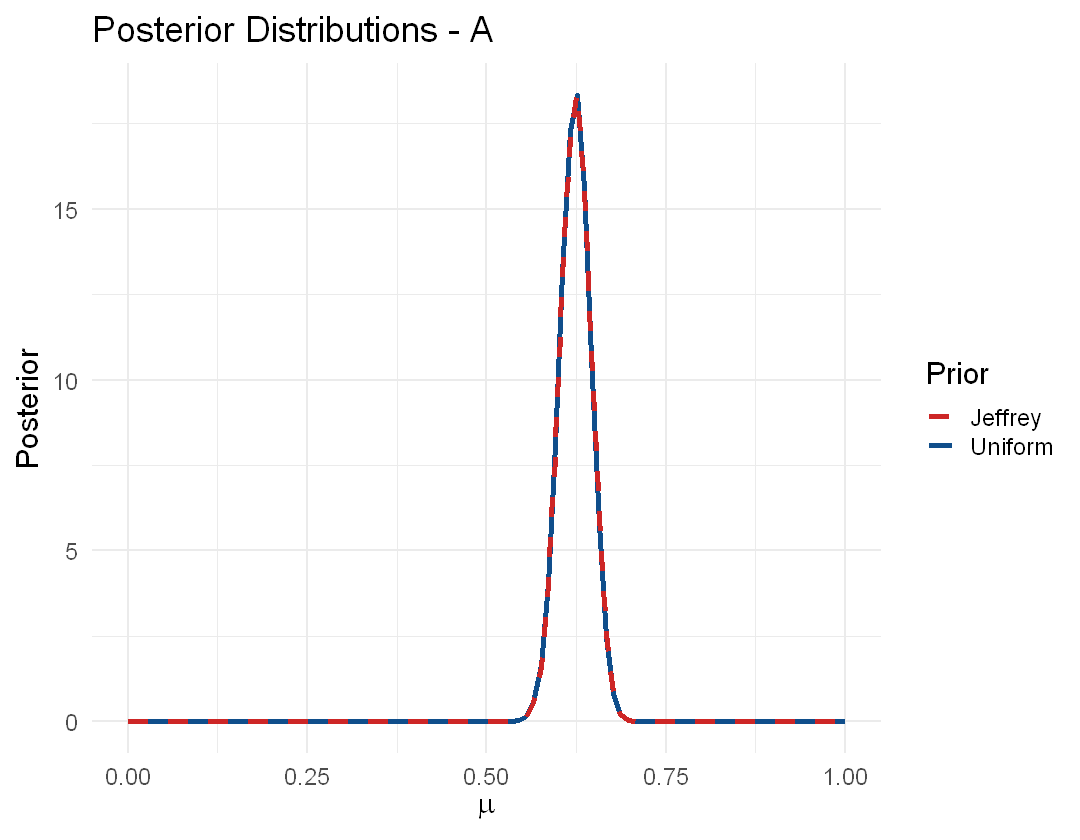

In [7]:
x <- seq(0, 1, length=100)
A.unif.pdf <- dbeta(x, A.unif.alpha, A.unif.beta)
A.jeff.pdf <- dbeta(x, A.jeff.alpha, A.jeff.beta)

options(repr.plot.width = 9, repr.plot.height = 7)

A.plot <- ggplot() +
	geom_line(aes(x=x, y=A.unif.pdf, color='Uniform'), lwd=1.5) +
	geom_line(aes(x=x, y=A.jeff.pdf, color='Jeffrey'), lwd=1.5, linetype='dashed') +
	labs(x=TeX(r'(\mu)'), y='Posterior', title='Posterior Distributions - A', color = 'Prior') +
	theme_minimal(base_size = 18) + 
	scale_color_manual(values=c('Uniform' = 'dodgerblue4', 'Jeffrey' = 'firebrick3'))

A.plot

**2.3)**

In [8]:
B.n <- 10
B.r <- 10

# Uniform prior -> Beta(1,1) prior -> Beta(r+1, n-r+1) = Beta(11, 1) posterior
B.unif.alpha <- 11
B.unif.beta <- 1

B.unif.mean <- B.unif.alpha/(B.unif.alpha + B.unif.beta)
B.unif.var <- (B.unif.alpha*B.unif.beta)/((B.unif.alpha + B.unif.beta)^2 * (B.unif.alpha + B.unif.beta + 1))

print(sprintf("Uniform Prior Mean: %.3f", B.unif.mean))
print(sprintf("Uniform Prior Variance: %.5f", B.unif.var))

[1] "Uniform Prior Mean: 0.917"
[1] "Uniform Prior Variance: 0.00588"


**2.4)**

[1] "Posterior Mean: 0.631"
[1] "Posterior Variance: 0.00045"


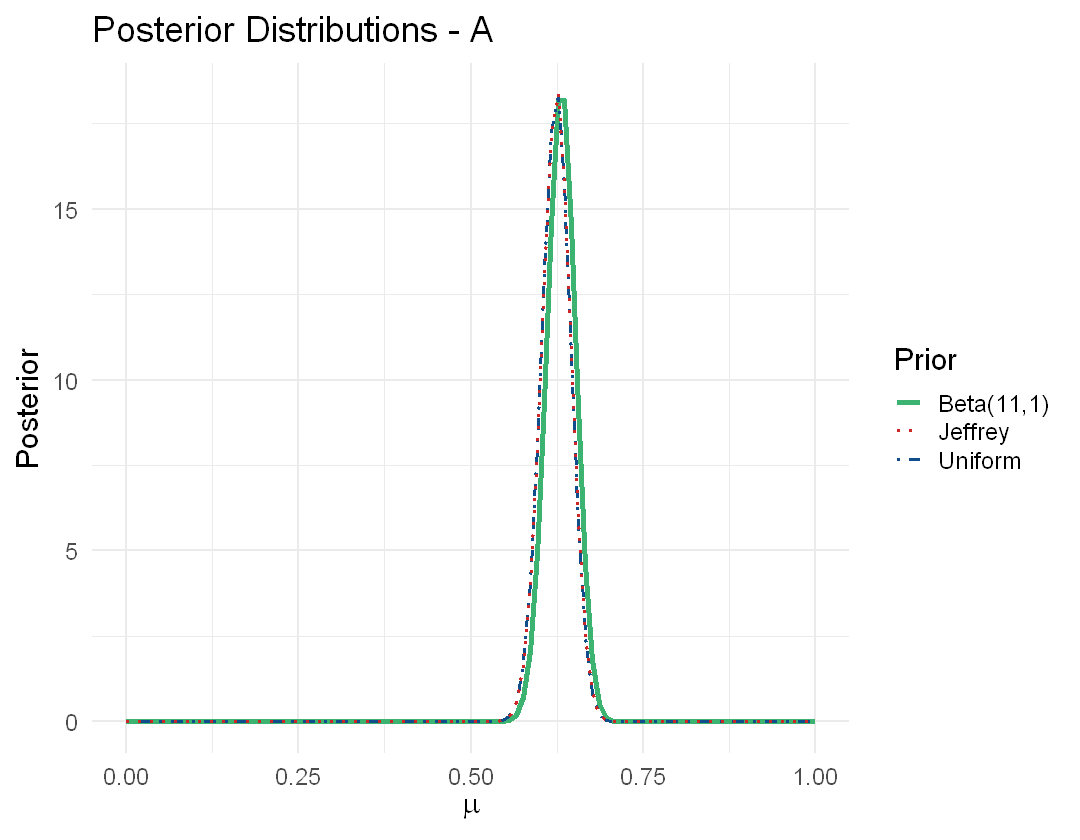

In [9]:
# Beta(11, 1) as prior for A -> Beta(11+312, 1+188) = Beta(323, 189) posterior 

A.new.alpha <- 323
A.new.beta <- 189

A.new.mean <- A.new.alpha/(A.new.alpha + A.new.beta)
A.new.var <- (A.new.alpha*A.new.beta)/((A.new.alpha + A.new.beta)^2 * (A.new.alpha + A.new.beta + 1))

print(sprintf("Posterior Mean: %.3f", A.new.mean))
print(sprintf("Posterior Variance: %.5f", A.new.var))

x <- seq(0, 1, length=100)

A.new.pdf <- dbeta(x, A.new.alpha, A.new.beta)

options(repr.plot.width = 9, repr.plot.height = 7)

A.new.plot <- ggplot() +
	geom_line(aes(x=x, y=A.new.pdf, color='Beta(11,1)'), lwd=1.5) +
	geom_line(aes(x=x, y=A.unif.pdf, color='Uniform'), lwd=1, linetype='dotdash') +
	geom_line(aes(x=x, y=A.jeff.pdf, color='Jeffrey'), lwd=1, linetype='dotted') +
	labs(x=TeX(r'(\mu)'), y='Posterior', title='Posterior Distributions - A', color = 'Prior') +
	theme_minimal(base_size = 18) + 
	scale_color_manual(values=c('Beta(11,1)' = 'mediumseagreen', 'Uniform' = 'dodgerblue4', 'Jeffrey' = 'firebrick3'))

A.new.plot

**2.5)**

In [10]:
d.ci <- emdbook::ncredint(x, A.new.pdf, level=0.95)

d.low.ci <- qbeta(0.025, A.new.alpha, A.new.beta)
d.high.ci <- qbeta(0.975, A.new.alpha, A.new.beta)

print(sprintf("95%% CI metod 1: [%.2f, %.2f]", d.ci[1], d.ci[2]))
cat('\n')
print(sprintf("95%% CI method 2: [%.2f, %.2f]", d.low.ci, d.high.ci))

[1] "95% CI metod 1: [0.60, 0.67]"

[1] "95% CI method 2: [0.59, 0.67]"


#### 3)  
**3.1)**  

- If we assume a uniform prior, this corresponds to $Beta(1,1)$. Since Beta prior is a conjugate function for the Binominal distribution, the
  - posterior distribution will be $Beta(a'=a+y, b'=b+n-y)$. With $n=30$ and $y=15$ $\rightarrow Beta(1+15, 1+30-15) = Beta(16, 16)$. 
- We assume now a Beta prior with mean value $m=0.5$ and standard deviation $s=0.1$. Therefore $a=b=12$ $\rightarrow Beta(12,12)$. So the posterior is $Beta(12+15, 12+30-15) = Beta(27,27)$.

- The likelihood is a binomial distribution $P(\{y_i\}|\theta) = \prod_i \theta^{y_i}(1-\theta)^{1-y_i} = P(y, n|\theta) = \binom{n}{y}\theta^y(1-\theta)^{n-y}$

TableGrob (2 x 2) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]

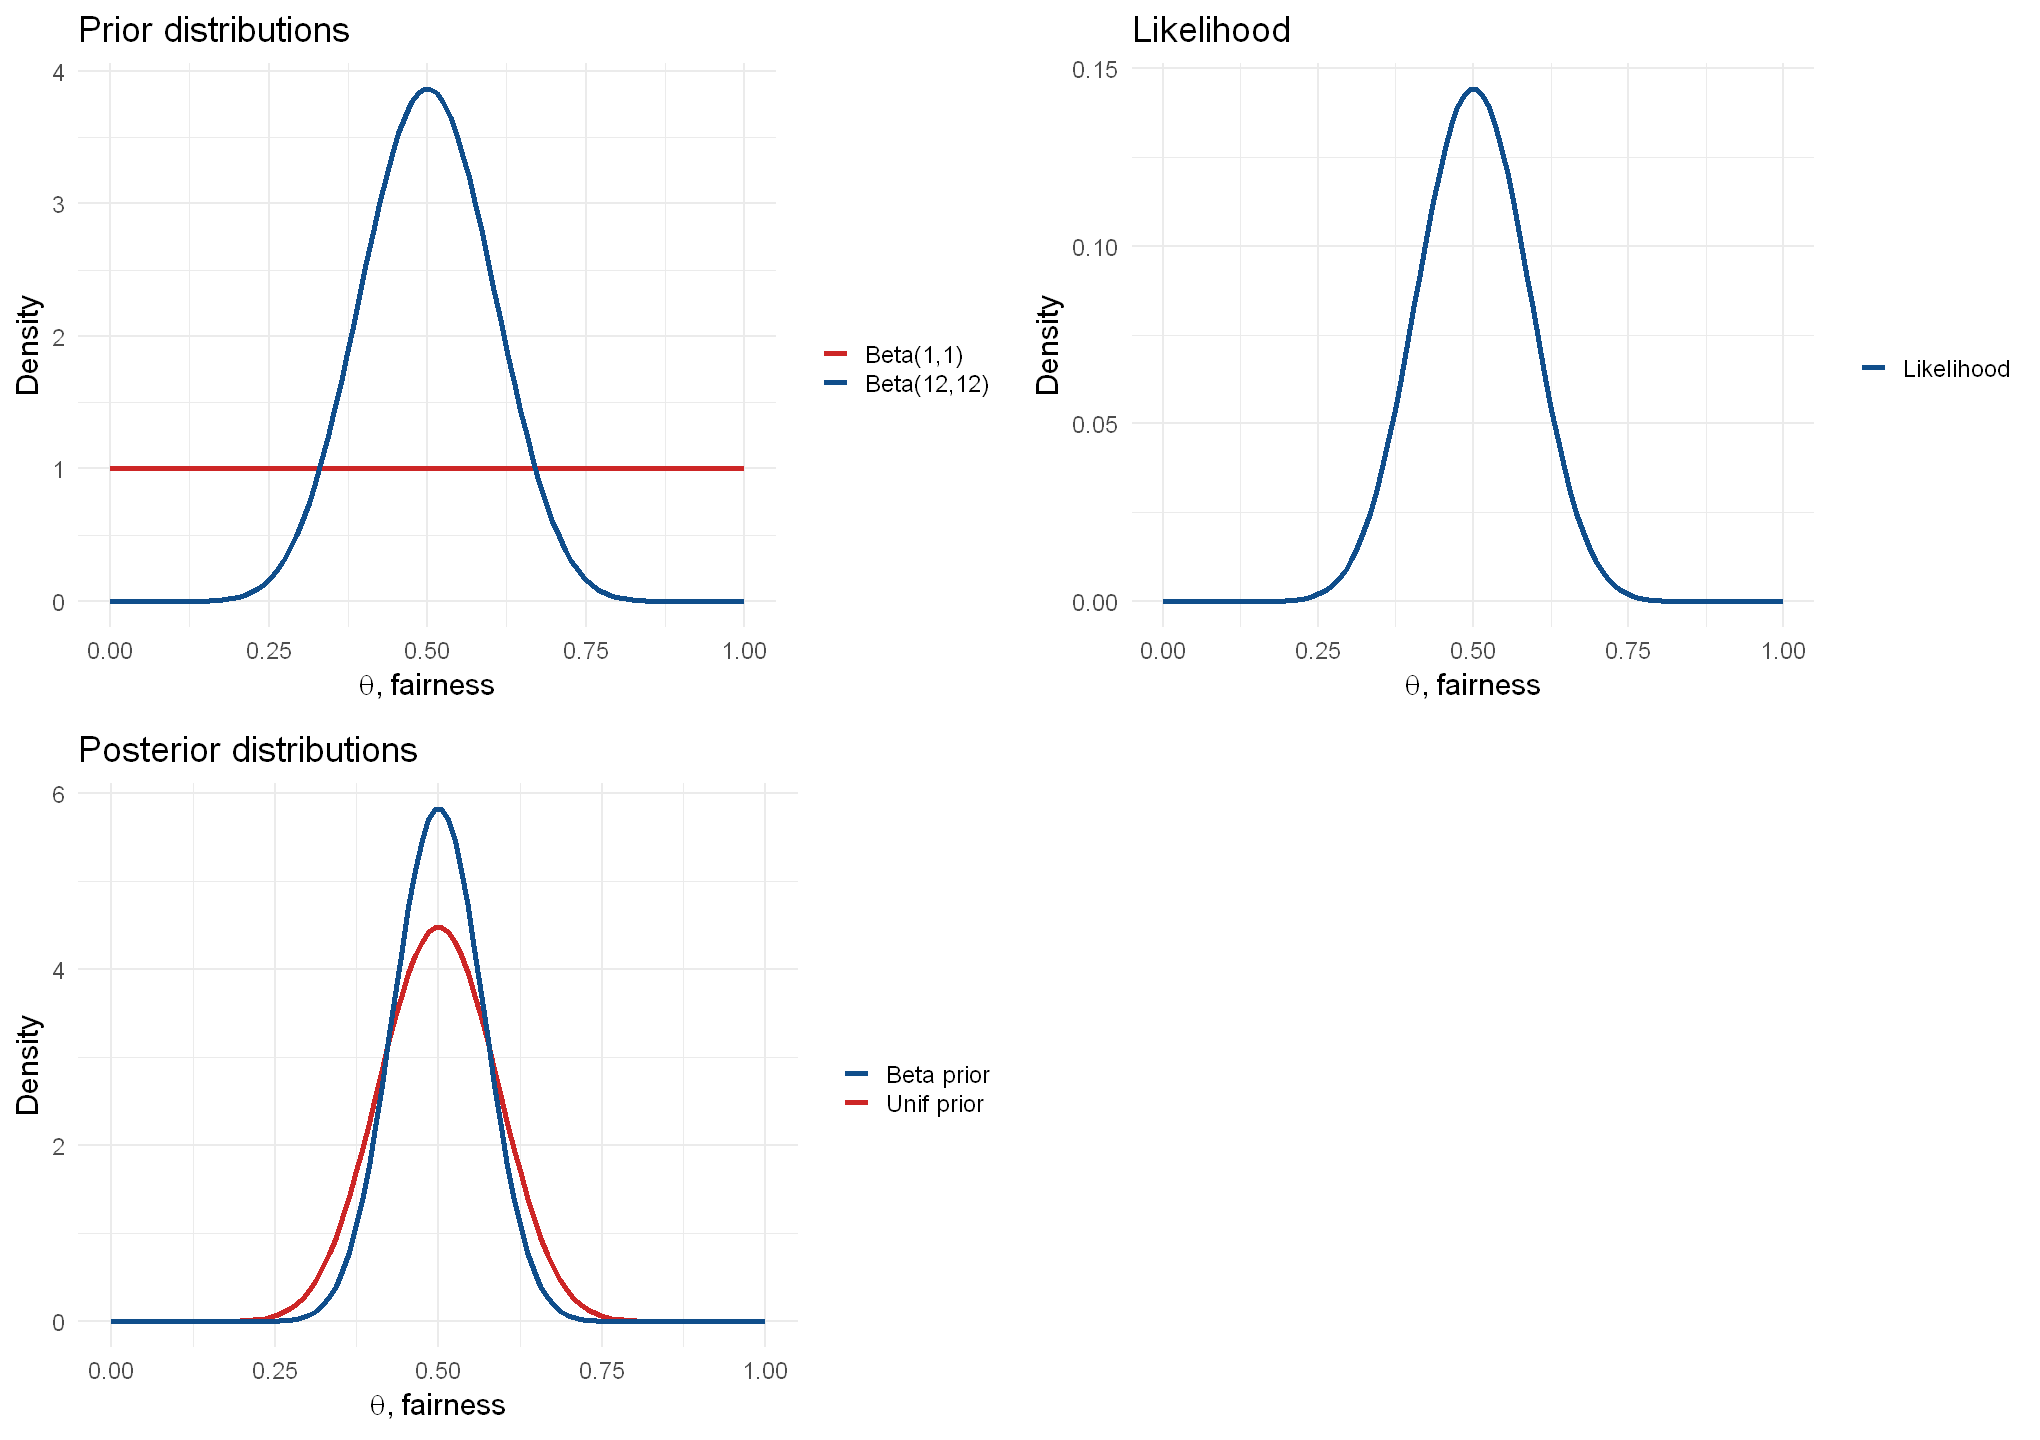

In [11]:
x <- seq(0, 1, length.out = 100) # seq of probs of having H

likelihood <- dbinom(x = 15, size = 30, prob = x) # 15 Heads (1) for each value of x

unif.prior.prior <- dbeta(x=x, shape1=1, shape2=1)
unif.prior.post <- dbeta(x=x, shape1=16, shape2=16)
# unif.prior.post <- unif.prior.prior * likelihood

beta.prior.prior <- dbeta(x=x, shape1=12, shape2=12)
beta.prior.post <- dbeta(x=x, shape1=27, shape2=27)
# beta.prior.post <- beta.prior.prior * likelihood

options(repr.plot.width = 17, repr.plot.height = 12)

coin.prior.plot <- ggplot() + 
	geom_line(aes(x=x, y=unif.prior.prior, color='Beta(1,1)'), lwd=1.5) +
	geom_line(aes(x=x, y=beta.prior.prior, color='Beta(12,12)'), lwd=1.5) +
	labs(x=TeX(r'(\theta, fairness)'), y='Density', title='Prior distributions', color='')+ 
	theme_minimal(base_size = 18) +
	scale_color_manual(values=c('Beta(1,1)' = 'firebrick3', 'Beta(12,12)' = 'dodgerblue4'))

likelihood.plot <- ggplot() + 
	geom_line(aes(x=x, y=likelihood, color='Likelihood'), lwd=1.5) +
	labs(x=TeX(r'(\theta, fairness)'), y='Density', title='Likelihood', color='') +
	theme_minimal(base_size = 18) +
	scale_color_manual(values=c('Likelihood' = 'dodgerblue4'))

coin.post.plot <- ggplot() +
	geom_line(aes(x=x, y=unif.prior.post, color='Unif prior'), lwd=1.5) +
	geom_line(aes(x=x, y=beta.prior.post, color='Beta prior'), lwd=1.5) +
	labs(x=TeX(r'(\theta, fairness)'), y='Density', title='Posterior distributions', color='')+
	theme_minimal(base_size = 18) +
	scale_color_manual(values=c('Unif prior' = 'firebrick3', 'Beta prior' = 'dodgerblue4'))

combined_plot <- grid.arrange(coin.prior.plot, likelihood.plot, coin.post.plot, nrow=2, ncol = 2)

combined_plot

**3.2)**  
- With the uniform prior, the posterior mean is $\hat{p}=m'=\frac{a'}{a'+b'}=\frac{16}{16+16}$
- With the beta prior, the posterior mean is $\hat{p}=m'=\frac{a'}{a'+b'}=\frac{27}{27+27}$

$\Rightarrow$ The most value coin probability $p$ is the same for both prior and it's $\hat{p}=0.5$.

[1] "95% CI for Uniform prior: [0.33, 0.67]"
[1] "95% CI for Beta prior: [0.37, 0.63]"


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


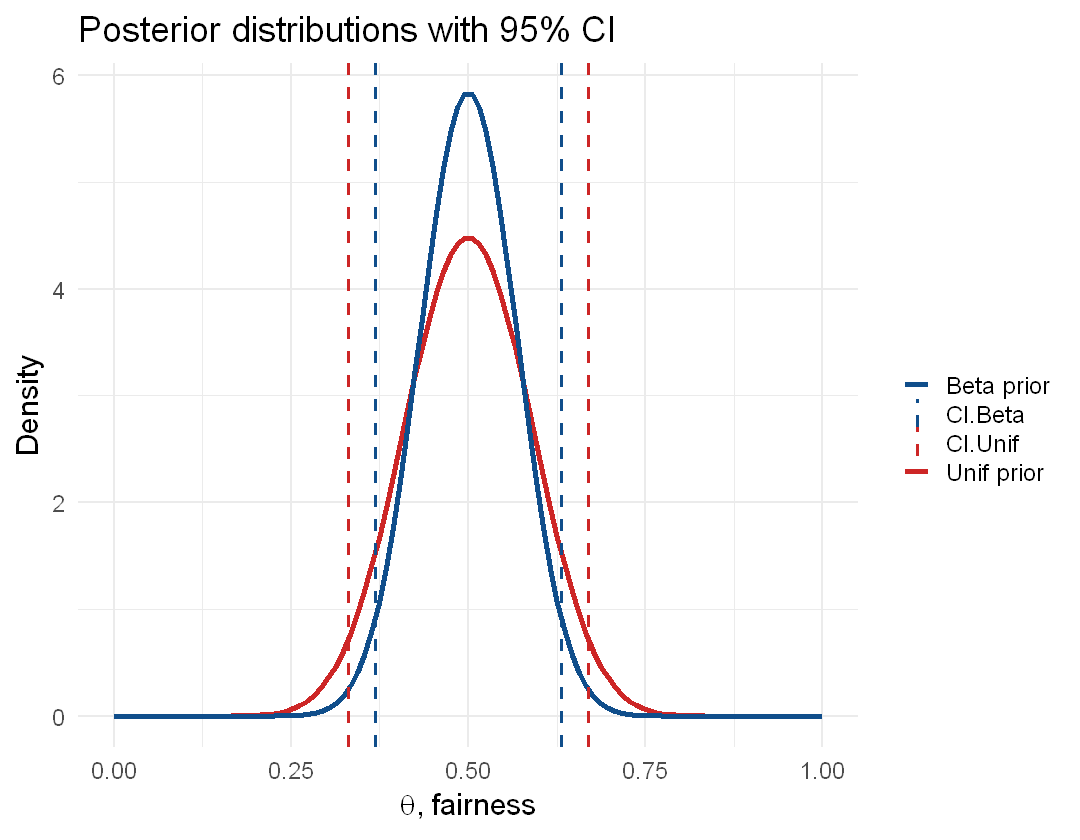

In [12]:
low.ci.unif <- qbeta(0.025, 16, 16)
high.ci.unif <- qbeta(0.975, 16, 16)

low.ci.beta <- qbeta(0.025, 27, 27)
high.ci.beta <- qbeta(0.975, 27, 27)

print(sprintf("95%% CI for Uniform prior: [%.2f, %.2f]", low.ci.unif, high.ci.unif))
print(sprintf("95%% CI for Beta prior: [%.2f, %.2f]", low.ci.beta, high.ci.beta))

options(repr.plot.width = 9, repr.plot.height = 7)

coin.ci.plot <- coin.post.plot + 
	geom_vline(aes(xintercept = low.ci.unif, color = "CI.Unif"), linewidth = 1, linetype='dashed') +
	geom_vline(aes(xintercept = high.ci.unif, color = 'CI.Unif'), linewidth = 1, linetype='dashed') +

	geom_vline(aes(xintercept = low.ci.beta, color = "CI.Beta"), linewidth = 1, linetype='dashed') +
	geom_vline(aes(xintercept = high.ci.beta, color = 'CI.Beta'), linewidth = 1, linetype='dashed') +

	labs(x=TeX(r'(\theta, fairness)'), y='Density', title='Posterior distributions with 95% CI', color='')+
	theme_minimal(base_size = 18) +
	scale_color_manual(values=c('Unif prior' = 'firebrick3', 'Beta prior' = 'dodgerblue4', 
		'CI.Unif' = 'firebrick3', 'CI.Beta' = 'dodgerblue4'))

coin.ci.plot


**3.3)**

In [13]:
coin.out <- sample(c(rep(1,times = 15), rep(0, times = 15)))

count_ones <- vector("integer", length(coin.out))
array_length <- vector("integer", length(coin.out))

a.beta.unif <- vector("numeric", length(coin.out))	
b.beta.unif <- vector("numeric", length(coin.out))
a.beta.beta <- vector("numeric", length(coin.out))
b.beta.beta <- vector("numeric", length(coin.out))

# unif.post.arr <- vector("numeric", length(coin.out))
# beta.post.arr <- vector("numeric", length(coin.out))

mean.unif <- vector("numeric", length(coin.out))
mean.beta <- vector("numeric", length(coin.out))

unif.ci.low <- vector("numeric", length(coin.out))
unif.ci.high <- vector("numeric", length(coin.out))
beta.ci.low <- vector("numeric", length(coin.out))
beta.ci.high <- vector("numeric", length(coin.out))

for (i in 1:length(coin.out)) {
	sub_array <- coin.out[1:i]
	count_ones[i] <- sum(sub_array)
	array_length[i] <- length(sub_array)

	a.beta.unif[i] <- 1 + count_ones[i]
	b.beta.unif[i] <- 1 + array_length[i] - count_ones[i]

	a.beta.beta[i] <- 12 + count_ones[i]
	b.beta.beta[i] <- 12 + array_length[i] - count_ones[i]

	x <- seq(0, 1, length.out = 100)

	unif.post <- dbeta(x=x, shape1=a.beta.unif[i], shape2=b.beta.unif[i])
	beta.post <- dbeta(x=x, shape1=a.beta.beta[i], shape2=b.beta.beta[i])

	mean.unif[i] <- a.beta.unif[i] / (a.beta.unif[i] + b.beta.unif[i])
	mean.beta[i] <- a.beta.beta[i] / (a.beta.beta[i] + b.beta.beta[i])

	#   unif.post.arr[i] <- unif.post
	#   beta.post.arr[i] <- beta.post

	unif.ci <- emdbook::ncredint(x, unif.post, level=0.95)
	beta.ci <- emdbook::ncredint(x, beta.post, level=0.95)

	unif.ci.low[i] <- unif.ci[1]
	unif.ci.high[i] <- unif.ci[2]
	beta.ci.low[i] <- beta.ci[1]
	beta.ci.high[i] <- beta.ci[2]

	print(sprintf("For %d flips:", i))
	print(sprintf("Mean for Uniform prior: %.2f", mean.unif[i]))
	print(sprintf("Mean for Beta prior: %.2f", mean.beta[i]))
	print(sprintf("95%% CI for Uniform prior: [%.2f, %.2f]", unif.ci[1], unif.ci[2]))
	print(sprintf("95%% CI for Beta prior: [%.2f, %.2f]", beta.ci[1], beta.ci[2]))
	cat('\n')
}


[1] "For 1 flips:"
[1] "Mean for Uniform prior: 0.67"
[1] "Mean for Beta prior: 0.52"
[1] "95% CI for Uniform prior: [0.00, 0.72]"
[1] "95% CI for Beta prior: [0.33, 0.71]"

[1] "For 2 flips:"
[1] "Mean for Uniform prior: 0.75"
[1] "Mean for Beta prior: 0.54"
[1] "95% CI for Uniform prior: [0.79, 1.00]"
[1] "95% CI for Beta prior: [0.35, 0.72]"

[1] "For 3 flips:"
[1] "Mean for Uniform prior: 0.60"
[1] "Mean for Beta prior: 0.52"
[1] "95% CI for Uniform prior: [0.23, 0.95]"
[1] "95% CI for Beta prior: [0.34, 0.70]"

[1] "For 4 flips:"
[1] "Mean for Uniform prior: 0.50"
[1] "Mean for Beta prior: 0.50"
[1] "95% CI for Uniform prior: [0.15, 0.85]"
[1] "95% CI for Beta prior: [0.32, 0.68]"

[1] "For 5 flips:"
[1] "Mean for Uniform prior: 0.57"
[1] "Mean for Beta prior: 0.52"
[1] "95% CI for Uniform prior: [0.24, 0.89]"
[1] "95% CI for Beta prior: [0.34, 0.69]"

[1] "For 6 flips:"
[1] "Mean for Uniform prior: 0.62"
[1] "Mean for Beta prior: 0.53"
[1] "95% CI for Uniform prior: [0.32, 0.92]"

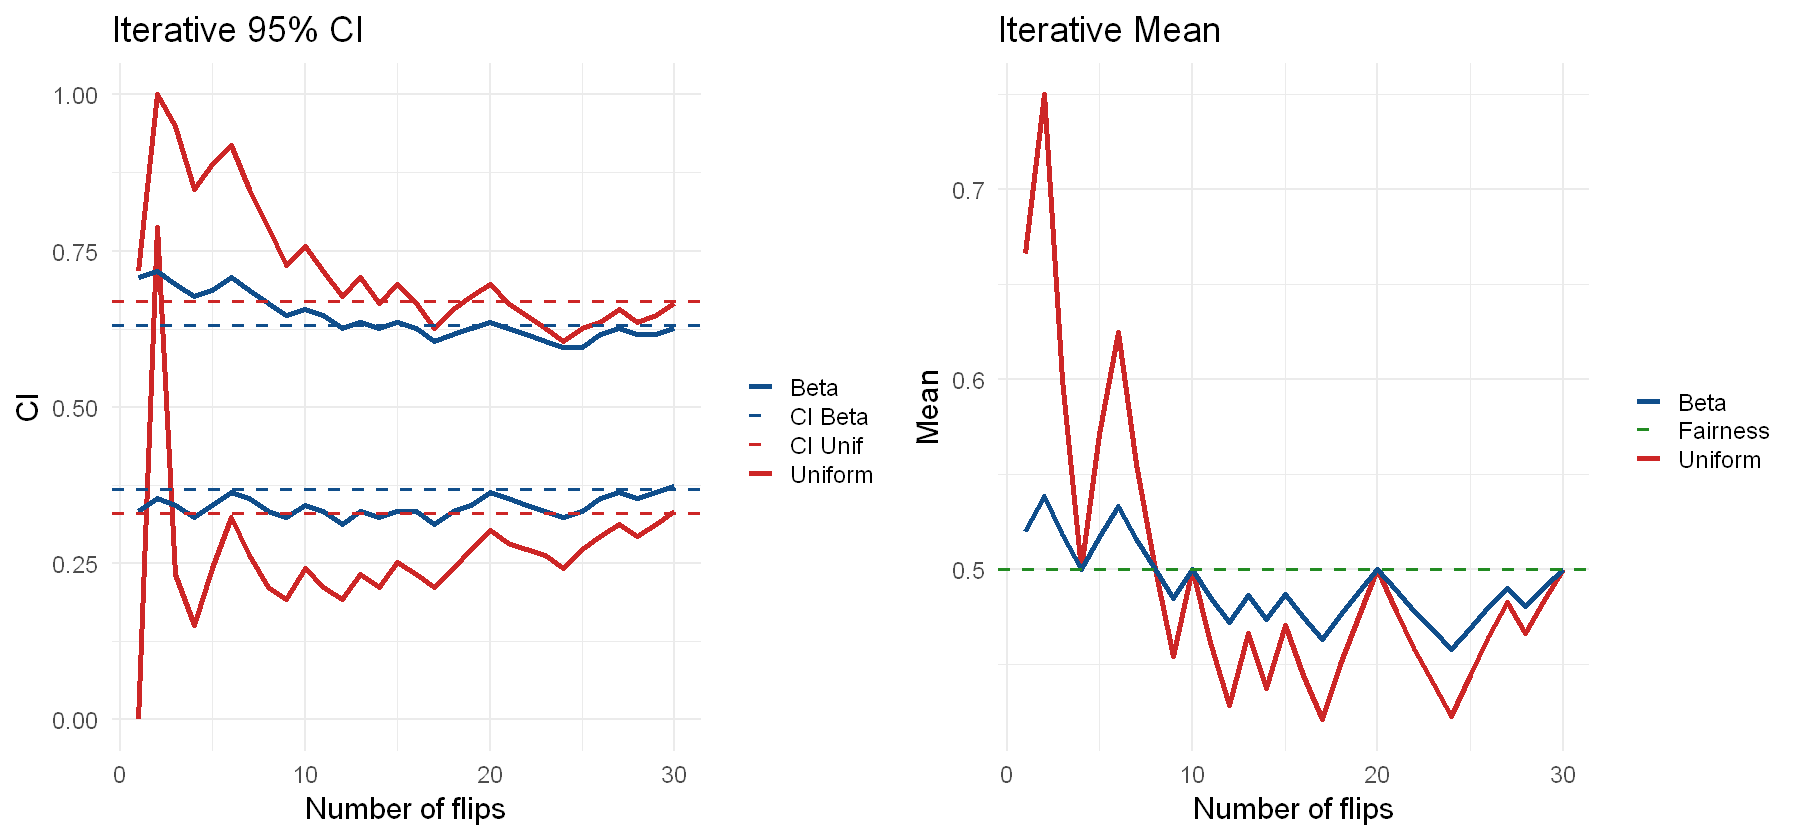

In [14]:
options(repr.plot.width = 15, repr.plot.height = 7)

ciit.coin.plot <- ggplot() + 
	geom_line(aes(x=1:length(coin.out), y=unif.ci.low, color='Uniform'), lwd=1.5) +
	geom_line(aes(x=1:length(coin.out), y=unif.ci.high, color='Uniform'), lwd=1.5) +
	geom_line(aes(x=1:length(coin.out), y=beta.ci.low, color='Beta'), lwd=1.5) +
	geom_line(aes(x=1:length(coin.out), y=beta.ci.high, color='Beta'), lwd=1.5) +

	geom_hline(aes(yintercept = low.ci.unif, color='CI Unif'), linetype='dashed', lwd=1) +
	geom_hline(aes(yintercept = high.ci.unif, color='CI Unif'), linetype='dashed', lwd=1) +
	geom_hline(aes(yintercept = low.ci.beta, color='CI Beta'), linetype='dashed', lwd=1) +
	geom_hline(aes(yintercept = high.ci.beta, color='CI Beta'), linetype='dashed', lwd=1) +

	labs(x='Number of flips', y='CI', title='Iterative 95% CI', color='')+
	theme_minimal(base_size = 18) +
	scale_color_manual(values=c('Uniform' = 'firebrick3', 'Beta' = 'dodgerblue4', 'CI Unif' = 'firebrick3', 'CI Beta' = 'dodgerblue4'))

mit.coin.plot <- ggplot() + 
	geom_line(aes(x=1:length(coin.out), y=mean.unif, color='Uniform'), lwd=1.5) +
	geom_line(aes(x=1:length(coin.out), y=mean.beta, color='Beta'), lwd=1.5) +

	geom_hline(aes(yintercept = 0.5, color='Fairness'), linetype='dashed', lwd=1) +

	labs(x='Number of flips', y='Mean', title='Iterative Mean', color='')+
	theme_minimal(base_size = 18) +
	scale_color_manual(values=c('Uniform' = 'firebrick3', 'Beta' = 'dodgerblue4', 'Fairness' = 'forestgreen'))

grid.arrange(ciit.coin.plot, mit.coin.plot, nrow=1, ncol = 2)



**3.4)**  
The results are the same only at the final step, that is when our priors coincide. The likelihood is the same in both cases, while the prior is different for each step (i.e. our prior is based on how many head (1s) appear in the sequence).  
The mean value is highly "biased", for the uniform prior, towards an "unfairness" of the coin (i.e. a prob of having H > 50%). While with a beta prior, the mean value is "clustered" around the true mean (i.e. 0.5), with a max mean value of 0.55 value. Moreover, the beta prior gives us a less conservative (i.e. more narrow region) 95% CI, which is pretty much the same for the different numbers of tosses. The uniform prior is, instead, a bit more conservative and only "converges" after ~20 tosses.

#### 4)  
**4.1)**  

We'll use a Dirichlet distribution as a conjugate prior to the multinomial distribution. The Dirichlet distribution is parameterized by a vector $\alpha$, where $\alpha_i$ represents the strength of belief in party $i$. The posterior distribution after observing the current poll data is also a Dirichlet distribution with parameters $\alpha' = \alpha_i + q_i$, where $q$ is the observed counts vector. 

- The expected value for the Dirichlet distribution:

   $E[i] = \frac{\alpha'_i}{\sum_{i=1}^{4}\alpha'_i}$


Party A:
[1] "Expected percentage of votes: 29"
[1] "0.68 credibility interval: 26 - 32"
Party B:
[1] "Expected percentage of votes: 16"
[1] "0.68 credibility interval: 13 - 18"
Party C:
[1] "Expected percentage of votes: 23"
[1] "0.68 credibility interval: 20 - 26"
Party D:
[1] "Expected percentage of votes: 34"
[1] "0.68 credibility interval: 30 - 37"


Warning message:
"Removed 100 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 100 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 100 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 100 rows containing missing values or values outside the scale range (`geom_line()`)."


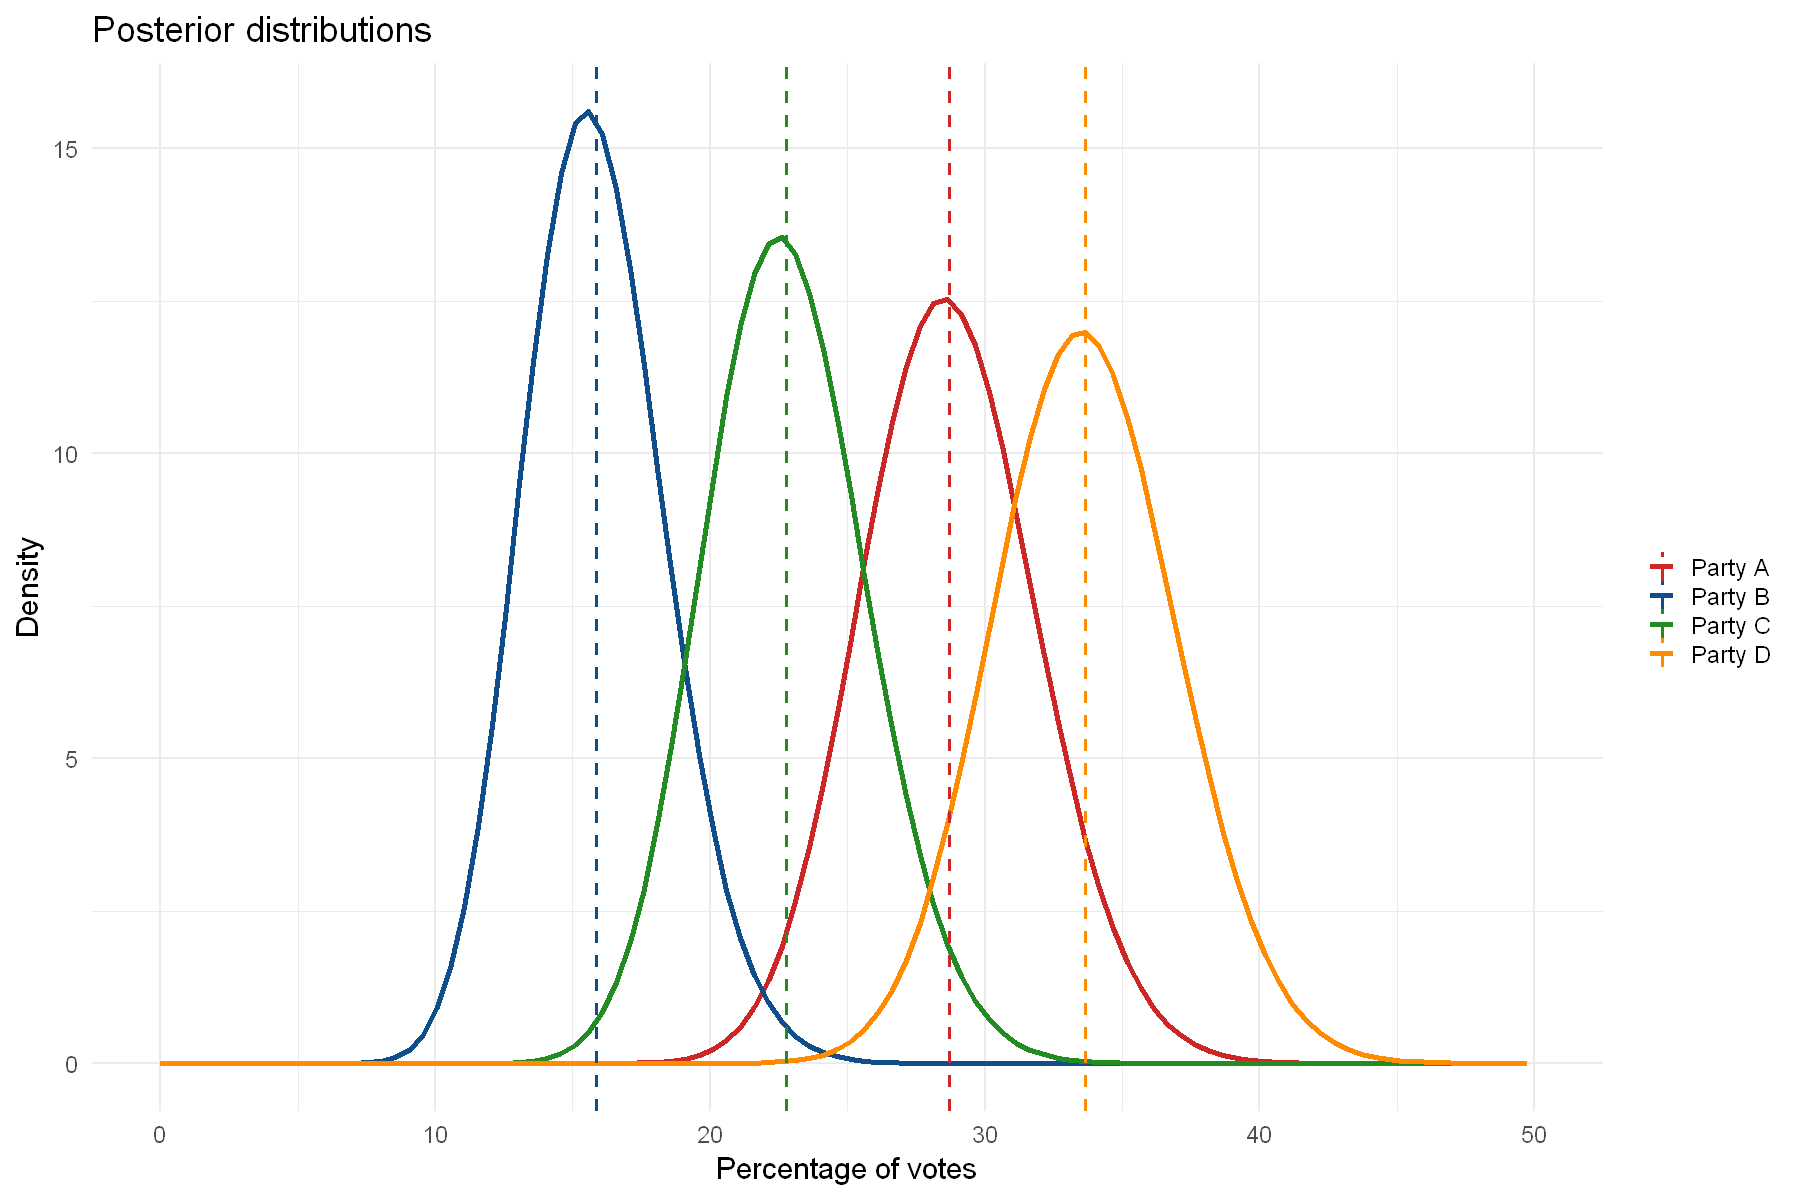

In [15]:
# Uniform prior
n.vol <- 200

a.vote <- 57
b.vote <- 31
c.vote <- 45
d.vote <- 67

x <- seq(0, 1, length.out = n.vol)

# Uniform prior = Beta(1,1) -> posterior is Beta(1+y, 1+n-y)=Beta(1+vote, 1+200-vote)

alpha_A <- a.vote + 1
beta_A <- 200 - a.vote + 1

alpha_B <- b.vote + 1
beta_B <- 200 - b.vote + 1

alpha_C <- c.vote + 1
beta_C <- 200 - c.vote + 1

alpha_D <- d.vote + 1
beta_D <- 200 - d.vote + 1

a.post <- dbeta(x=x, shape1=alpha_A, shape2=beta_A)
b.post <- dbeta(x=x, shape1=alpha_B, shape2=beta_B)
c.post <- dbeta(x=x, shape1=alpha_C, shape2=beta_C)
d.post <- dbeta(x=x, shape1=alpha_D, shape2=beta_D)

expected_percent_A <- alpha_A / (alpha_A + beta_A) * 100
expected_percent_B <- alpha_B / (alpha_B + beta_B) * 100
expected_percent_C <- alpha_C / (alpha_C + beta_C) * 100
expected_percent_D <- alpha_D / (alpha_D + beta_D) * 100

cred_interval_A <- qbeta(c(0.16, 0.84), alpha_A, beta_A) * 100
cred_interval_B <- qbeta(c(0.16, 0.84), alpha_B, beta_B) * 100
cred_interval_C <- qbeta(c(0.16, 0.84), alpha_C, beta_C) * 100
cred_interval_D <- qbeta(c(0.16, 0.84), alpha_D, beta_D) * 100

# Print results
cat("Party A:\n")
print(sprintf("Expected percentage of votes: %.0f", expected_percent_A))
print(sprintf("0.68 credibility interval: %.0f - %.0f", cred_interval_A[1], cred_interval_A[2]))

cat("Party B:\n")
print(sprintf("Expected percentage of votes: %.0f", expected_percent_B))
print(sprintf("0.68 credibility interval: %.0f - %.0f", cred_interval_B[1], cred_interval_B[2]))

cat("Party C:\n")
print(sprintf("Expected percentage of votes: %.0f", expected_percent_C))
print(sprintf("0.68 credibility interval: %.0f - %.0f", cred_interval_C[1], cred_interval_C[2]))

cat("Party D:\n")
print(sprintf("Expected percentage of votes: %.0f", expected_percent_D))
print(sprintf("0.68 credibility interval: %.0f - %.0f", cred_interval_D[1], cred_interval_D[2]))

options(repr.plot.width = 15, repr.plot.height = 10)

vote.plot <- ggplot() + 
	geom_line(aes(x=x*100, y=a.post, color='Party A'), lwd=1.5) +
	geom_line(aes(x=x*100, y=b.post, color='Party B'), lwd=1.5) +
	geom_line(aes(x=x*100, y=c.post, color='Party C'), lwd=1.5) +
	geom_line(aes(x=x*100, y=d.post, color='Party D'), lwd=1.5) +

	geom_vline(aes(xintercept = expected_percent_A, color='Party A'), linetype='dashed', lwd=1) +
	geom_vline(aes(xintercept = expected_percent_B, color='Party B'), linetype='dashed', lwd=1) +
	geom_vline(aes(xintercept = expected_percent_C, color='Party C'), linetype='dashed', lwd=1) +
	geom_vline(aes(xintercept = expected_percent_D, color='Party D'), linetype='dashed', lwd=1) +

	labs(x='Percentage of votes', y='Density', title='Posterior distributions', color='')+
	theme_minimal(base_size = 18) +
	scale_color_manual(values=c('Party A' = 'firebrick3', 'Party B' = 'dodgerblue4', 'Party C' = 'forestgreen', 'Party D' = 'darkorange')) + 
	xlim(c(0,50))

vote.plot

[1] "Expected values (perc of votes) for each party:"
[1] "A: 30"
[1] "B: 15"
[1] "C: 24"
[1] "D: 31"
[1] "0.68 CI for party A: 27 - 33"
[1] "0.68 CI for party B: 12 - 17"
[1] "0.68 CI for party C: 21 - 27"
[1] "0.68 CI for party D: 27 - 34"


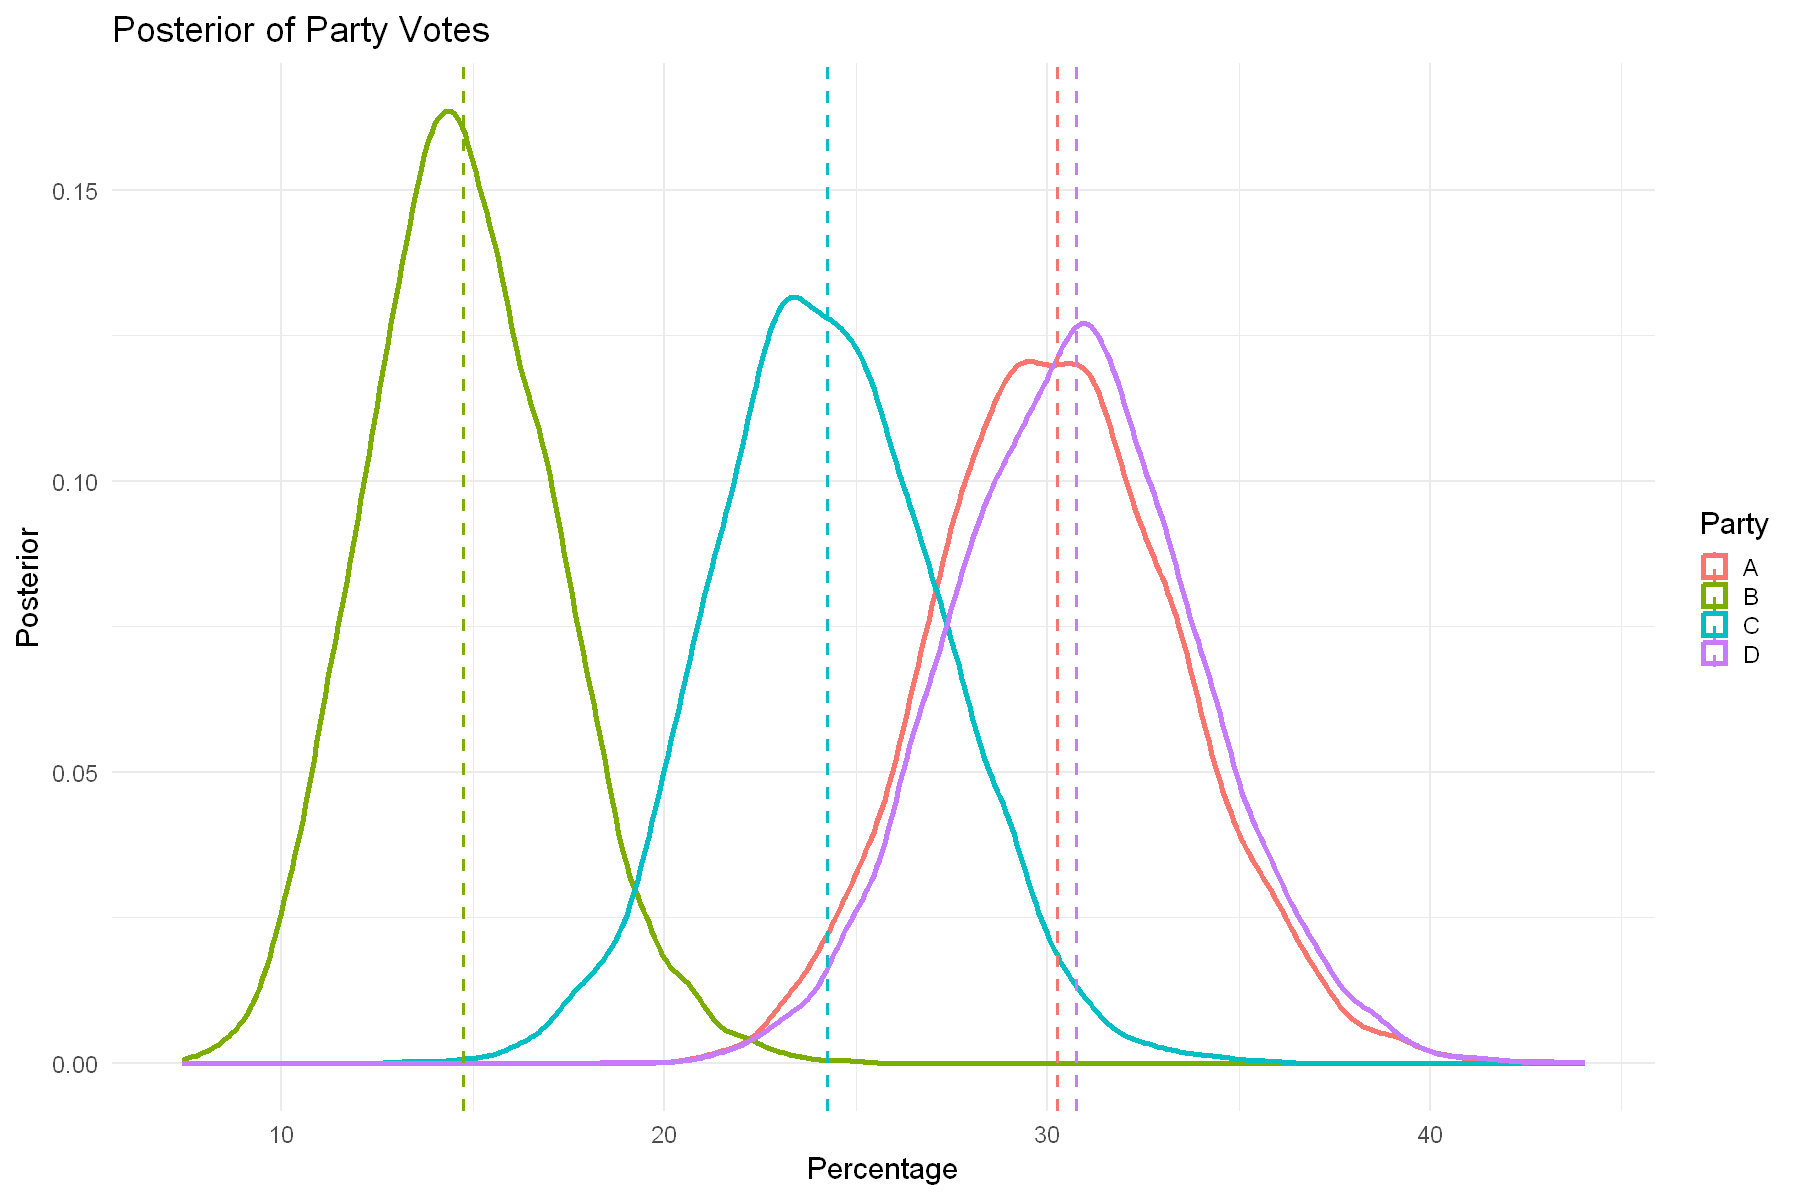

In [16]:
# Dirichlet prior
prior.counts <- c(32, 14, 26, 28)/100
observed.counts <- c(57, 31, 45, 67)/200

posterior.param <- prior.counts + observed.counts

exp.val <- (posterior.param / sum(posterior.param))*100

print(sprintf("Expected values (perc of votes) for each party:"))
print(sprintf("A: %.0f", exp.val[1]))
print(sprintf("B: %.0f", exp.val[2]))
print(sprintf("C: %.0f", exp.val[3]))
print(sprintf("D: %.0f", exp.val[4]))

# Sample from the Dirichlet distribution
num_samples <- 10000
samples <- rdirichlet(n=num_samples, alpha=posterior.param*100)*100

# Calculate the 68% credibility interval for each party
credibility_intervals <- t(apply(samples, 2, function(x) quantile(x, c(0.16, 0.84))))


# Create a data frame for plotting
votes.df <- data.frame(
	party = rep(c("A", "B", "C", "D"), each=num_samples),
	perc = c(samples[,1], samples[,2], samples[,3], samples[,4]),
	expval = c(rep(exp.val[1], num_samples), rep(exp.val[2], num_samples), rep(exp.val[3], num_samples), rep(exp.val[4], num_samples))
)

# Print credibility intervals
for (i in 1:nrow(credibility_intervals)) {
  print(sprintf("0.68 CI for party %s: %.0f - %.0f", unique(votes.df$party)[i], credibility_intervals[i, 1], credibility_intervals[i, 2]))
}

# Plot
dir.plot <- ggplot(votes.df, aes(x=perc, color=party)) +
	geom_density(lwd=1.5) +
	geom_vline(aes(xintercept = expval, color=party), linetype='dashed', lwd=1) + 
	labs(title="Posterior of Party Votes",
		x="Percentage", y="Posterior", color='Party') +
	theme_minimal(base_size = 18) 

dir.plot

**4.2)**  
To calculate the sample size required to obtain a margin of error less than or equal to $\pm 3\%$ for each party, we can use the formula for sample size in a proportion estimation:  
$$n_i=\frac{N_i\cdot p(1-p)}{(N-1)\frac{d^2}{z_{\alpha/2}^2} + p(1-p)} \approx \frac{z_{\alpha/2}^2\cdot p(1-p)}{d^2}$$  
Where: 
- $N_i$ is the number of samples we are currently considering for party *i*;
- $p$ is the probability of "electing" party *i*;
- $d$ is the error we want to achieve;
- $z_{\alpha/2}$ is the z-score corresponding to the CI we are considering.
The $\approx$ equation can be used when the finite population correction can be neglected.  
There's another way of estimating $n$, that is: give an educated guess, i.e. using $p=\hat{p}$ in the lhs of the equation.

[1] "68% CI"


type,party,sample_size
<chr>,<chr>,<dbl>


[1] "95% CI"


type,party,sample_size
<chr>,<chr>,<dbl>
P,A,870
P,B,560
P,C,745
P,D,951
P_hat,A,901
P_hat,B,537
P_hat,C,785
P_hat,D,909


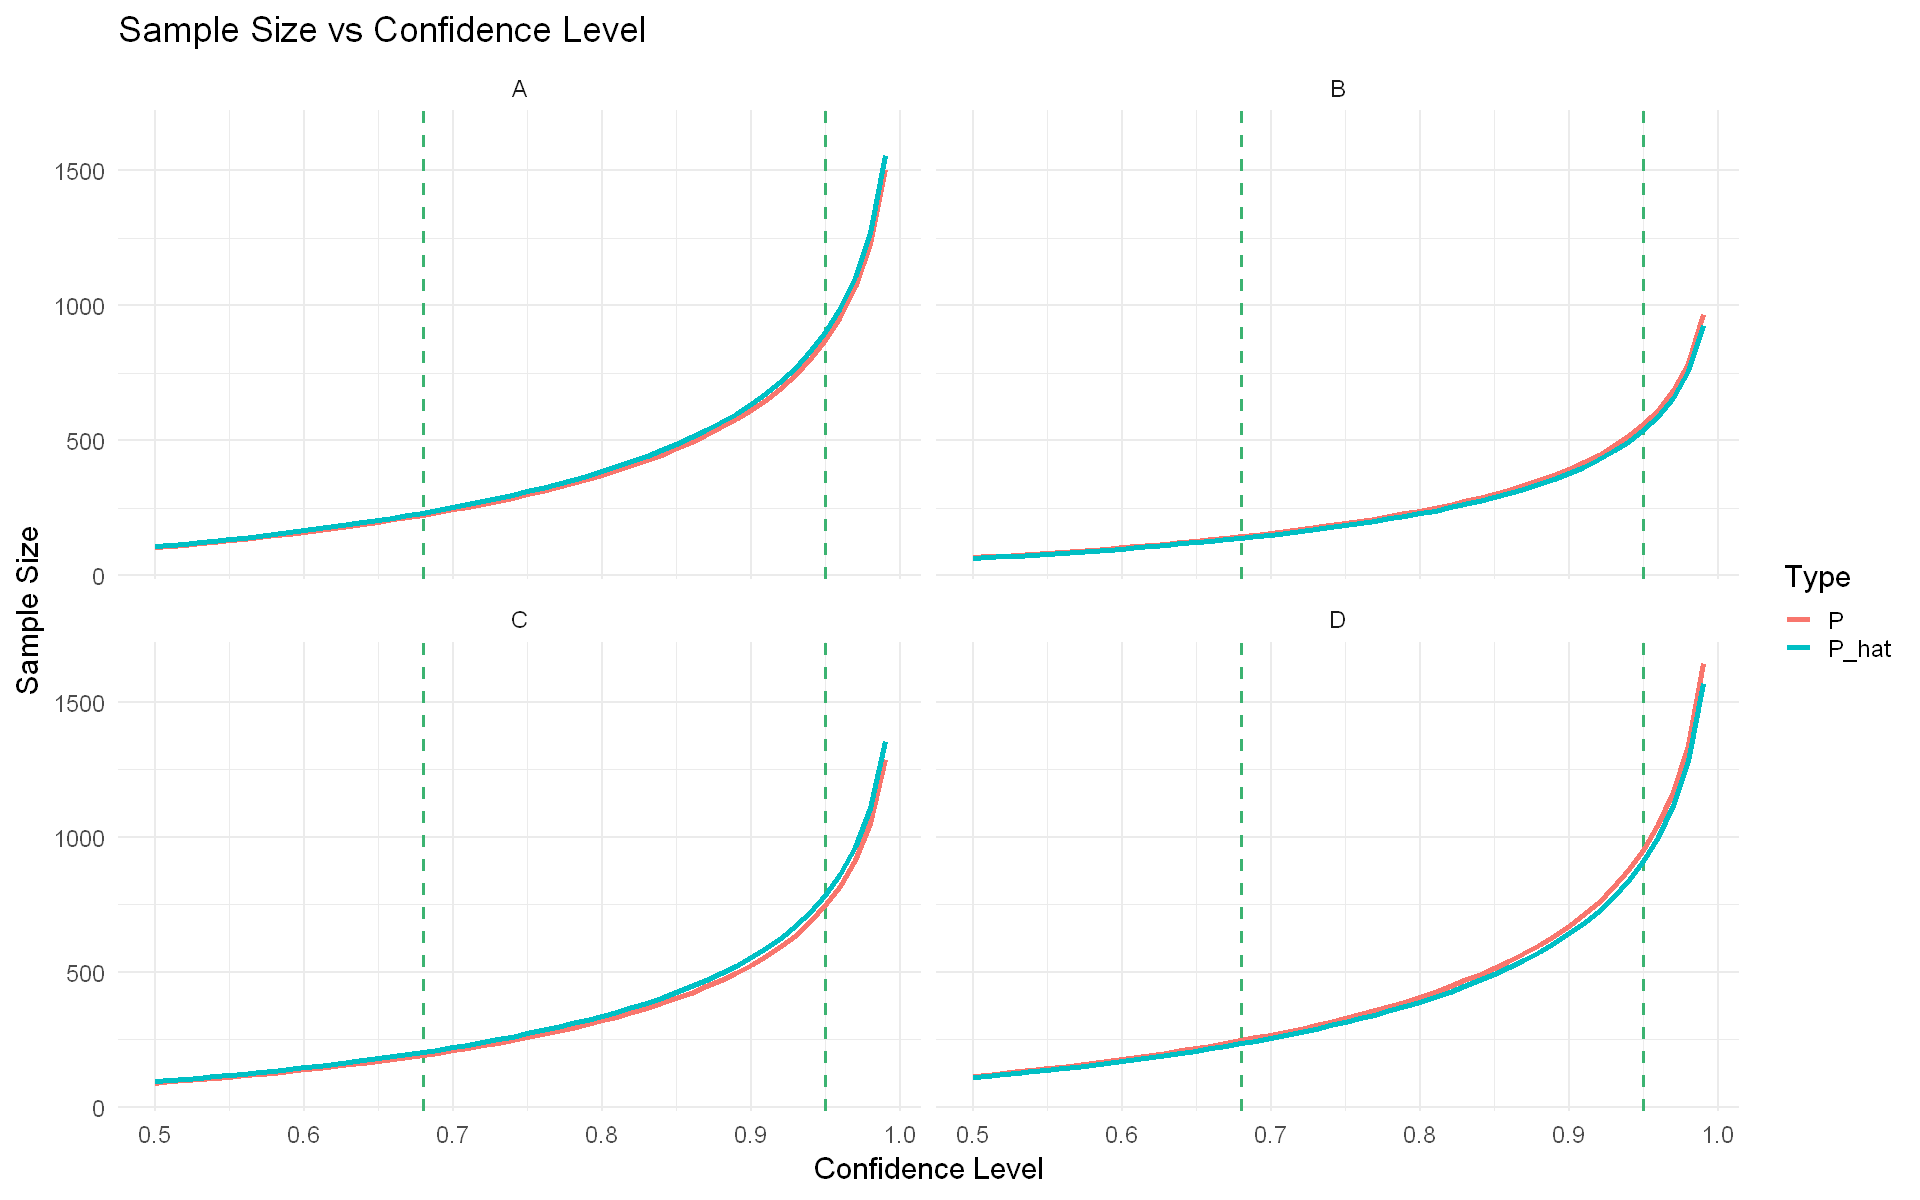

In [17]:
# Functions to calculate sample size for proportion estimation
sample.size.approx <- function(p, margin_of_error = d, confidence_level = confidence_level) {

  z <- qnorm((1 + confidence_level) / 2)  # Calculate z-score
  n <- (z^2 * p * (1 - p)) / margin_of_error^2 

  return(ceiling(n))  

}

# Initial proportions
proportions <- c(A = 57/200, B = 31/200, C = 45/200, D = 67/200)

p.hat <- c(A = exp.val[1]/100, B = exp.val[2]/100, C = exp.val[3]/100, D = exp.val[4]/100)

margin_of_error <- 0.03  # ±3%

confidence_levels <- seq(0.5, 0.99, by = 0.01)  # Different values for confidence level

sample.sizes.in <- sapply(confidence_levels, function(cl) sapply(proportions, function(p) sample.size.approx(p, margin_of_error, cl)))
sample.sizes.phat <- sapply(confidence_levels, function(cl) sapply(p.hat, function(p) sample.size.approx(p, margin_of_error, cl)))

sample.sizes.in.df <- data.frame(confidence_level = rep(confidence_levels, each = 4),
                               party = rep(names(proportions), times = length(confidence_levels)),
                               sample_size = as.vector(sample.sizes.in))

sample.sizes.phat.df <- data.frame(confidence_level = rep(confidence_levels, each = 4),
                                    party = rep(names(p.hat), times = length(confidence_levels)),
                                    sample_size = as.vector(sample.sizes.phat))

combined.df <- rbind(sample.sizes.in.df, sample.sizes.phat.df)
combined.df$type <- rep(c("P", "P_hat"), each = nrow(combined.df) / 2)

options(repr.plot.width = 16, repr.plot.height = 10)

sample.sizes.plot <- ggplot(combined.df, aes(x = confidence_level, y = sample_size, color = type)) +
	geom_vline(xintercept = c(0.68, 0.95), linetype = "dashed", color='mediumseagreen', lwd=1) +
	geom_line(lwd=1.5) + 
	facet_wrap(~party)+
	labs(title = "Sample Size vs Confidence Level",
		x = "Confidence Level",
		y = "Sample Size",
		color = "Type") +
	theme_minimal(base_size = 18)

sample.sizes.plot

print("68% CI")
combined.df %>% filter(confidence_level == 0.68) %>% select(type, party, sample_size)

print("95% CI") 
combined.df %>% filter(confidence_level == 0.95) %>% select(type, party, sample_size)

I don't know for which mysterious mystery the 0.68 CI for sample.sizes.in is not displayed. It exists in the dataframe, but when I filter it out it doesn't show up. So, i call again the function and I print it here

In [18]:
sample.sizes.in <- sapply(proportions, function(p) sample.size.approx(p, margin_of_error, confidence_level=0.68))

sample.sizes.phat <- sapply(p.hat, function(p) sample.size.approx(p, margin_of_error, confidence_level=0.68))

print("68% CI - P")
print(sample.sizes.in)
cat('\n')
print("68% CI - P_hat")
print(sample.sizes.phat)

[1] "68% CI - P"
  A   B   C   D 
224 144 192 245 

[1] "68% CI - P_hat"
  A   B   C   D 
232 139 202 234 
